In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier


In [2]:
# read in data sets
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Evaluating the DF
df.shape
# ooo boy thats a big one

(103904, 25)

# Cleaning the Data

> The first step is to clean the data by removing unescessary columns, checking for null values, and dealing with outliers.

In [4]:
# First thing i noticed is an unecessary unnamed column that seems to just duplicate the ID so we will get rid of that
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


> Now we work on null values, starting by seeing how many we have. 

In [5]:
df.isna().sum()
#The only feature with missing values is Arrival Delay in Minutes!

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
df['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

> With this value we see a large number of values are 0, and can make a logical assumption that the intent of the null values was the same, so we will simply change them to 0.

In [7]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [8]:
df['Arrival Delay in Minutes'].isna().sum()

0

> As we can see the null values have been dealt with! Now we move on to outliers!

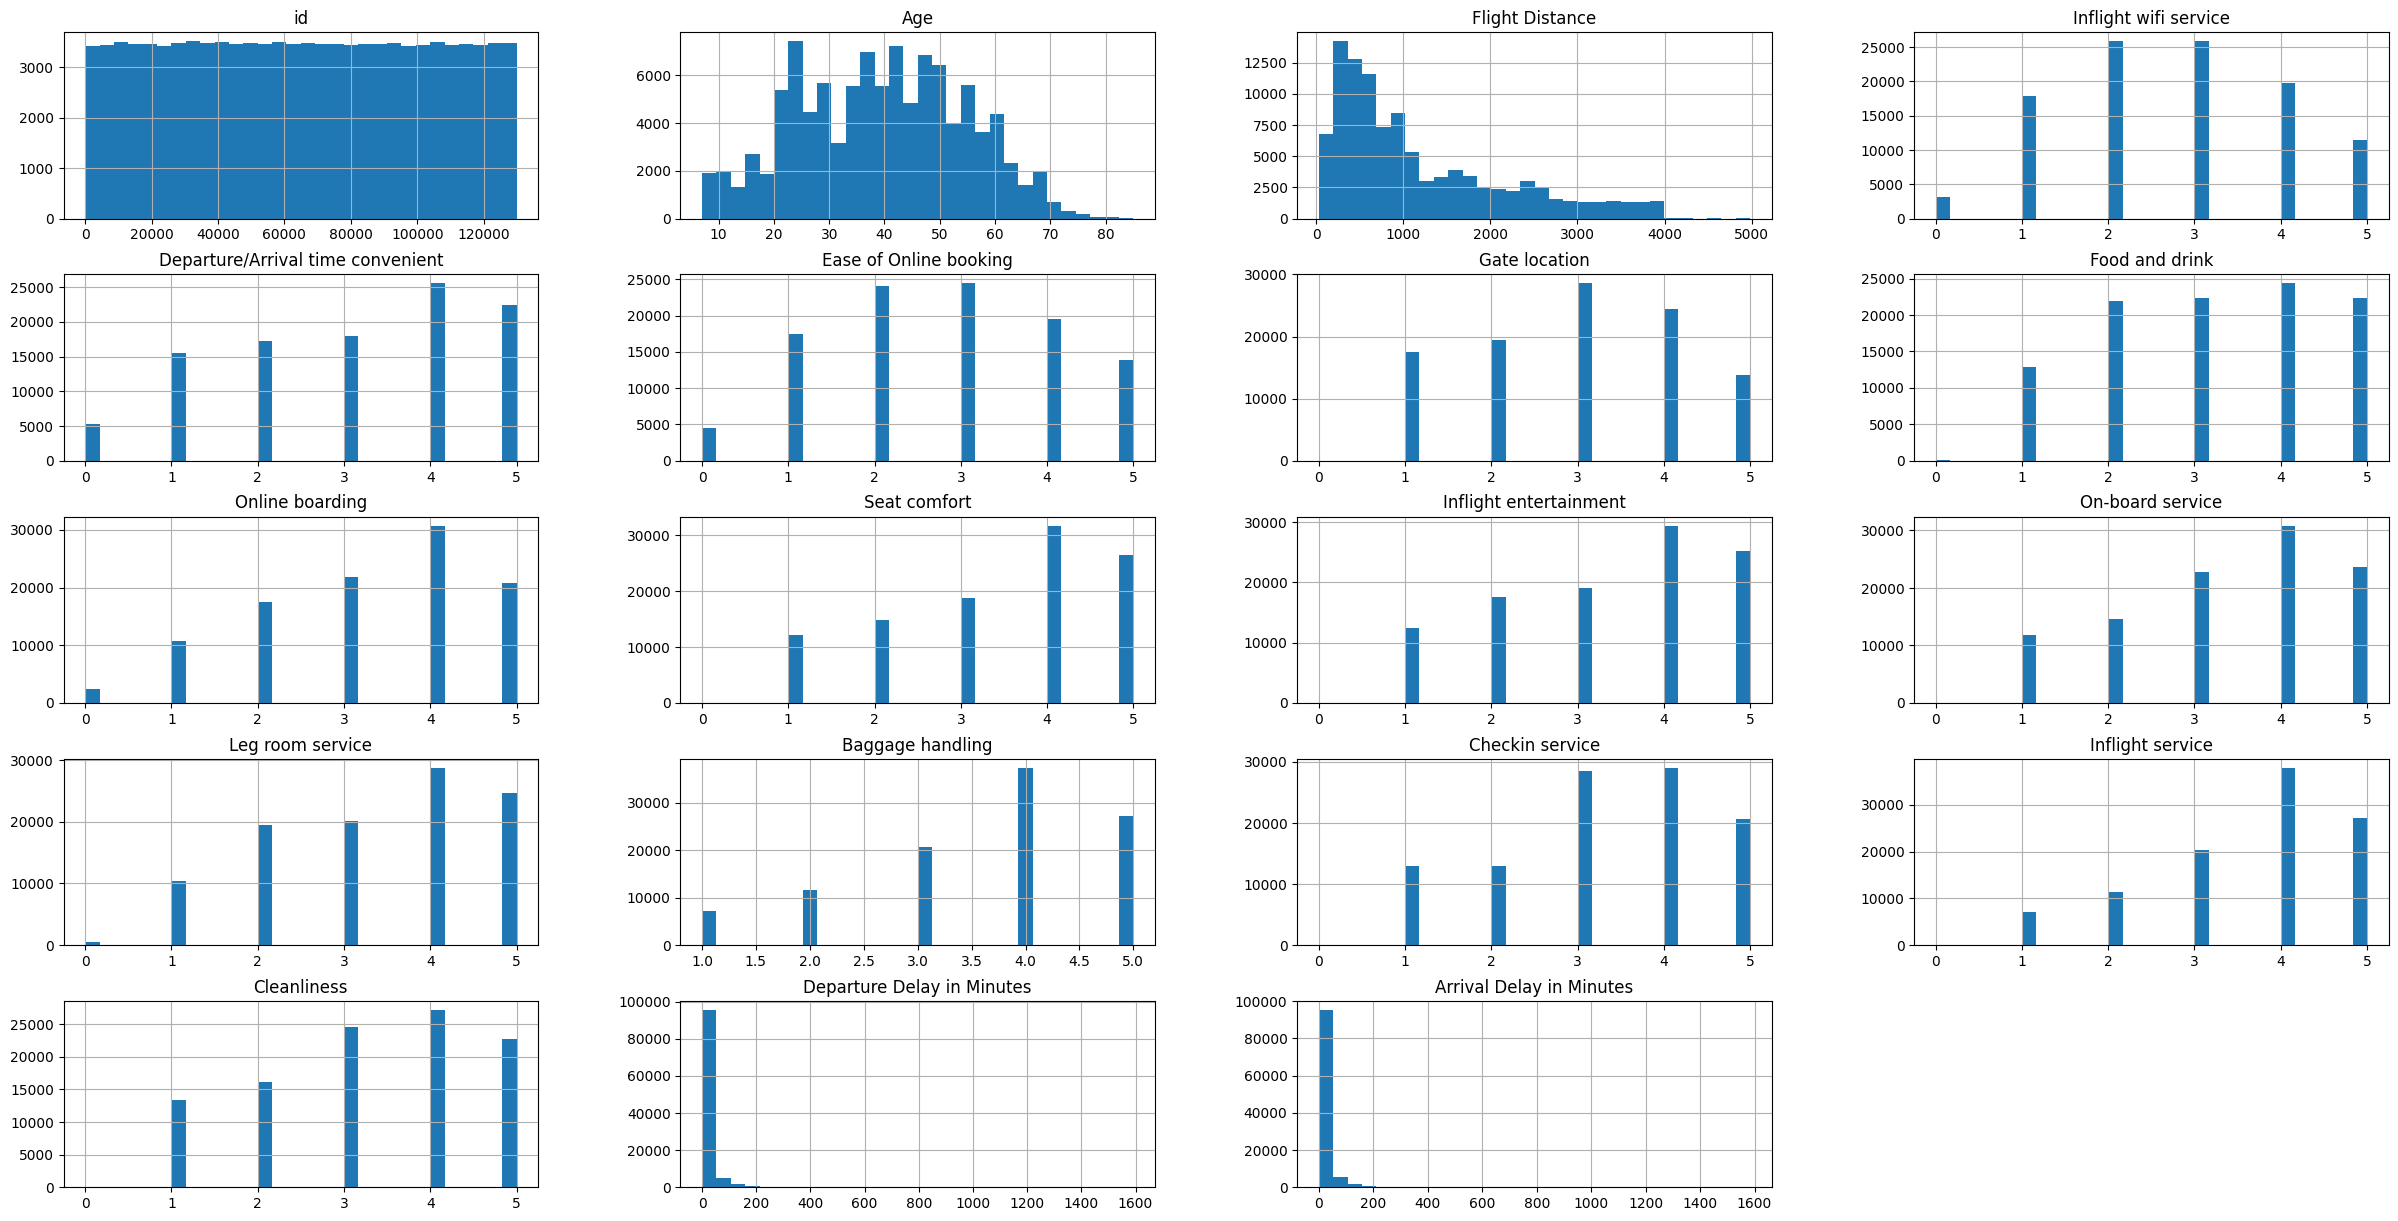

In [9]:
# using histograms to see if there are any concerning outliers at a glance
df.hist(bins = 30, figsize = (30, 15));

> The only features at risk of interuptive outliers are Age, Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes. The first two seem fine with Flight distance having a few outliers but nothing major. However, both delay features seem to have extreme outliers we will need to deal with

In [10]:
# Finding all values above 350 minutes
Delay_Outlier = df.loc[df['Departure Delay in Minutes'] > 350, 'Departure Delay in Minutes']
Delay_Outlier

1264      412
1467      391
2075      435
4596      480
5056      438
         ... 
101041    394
101171    400
101920    724
102609    358
103281    360
Name: Departure Delay in Minutes, Length: 136, dtype: int64

In [11]:
Arrival_Outlier = df.loc[df['Arrival Delay in Minutes'] > 350, 'Arrival Delay in Minutes']
Arrival_Outlier

1264      459.0
1467      354.0
2075      470.0
4596      471.0
5056      438.0
          ...  
101041    392.0
101096    385.0
101171    393.0
101920    705.0
102609    369.0
Name: Arrival Delay in Minutes, Length: 142, dtype: float64

> Looking at these lists, we can see over 100 of each type over 350 minutes. While this may seem like a lot it is less than 1% of the total DF So i have chosen to remove these outliers to improve the models consistancy. 

In [12]:
df = df.drop(df[(df['Departure Delay in Minutes'] > 350) | (df['Arrival Delay in Minutes'] > 350)].index)
df.shape

(103747, 24)

> All together we dropped 157 rows from the DF. With Cleaning done we move on to the next step.

# Catagorical Values

> Now we must decide what we want to do with the Catagorical Values in this data set. As I would like to include as much data as possible I will be making dummies for them to use in our model. 

In [13]:
#Checking Dtypes to ensure everything is good and check witch columns need dummied
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [14]:
df_clean = pd.get_dummies(df, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype = int)
df_clean.dtypes

id                                     int64
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
Gender_Female                          int32
Gender_Male                            int32
Customer T

> With the data clean and ready to go the last thing I want to do is create a heatmap to see correlations. 

In [15]:
#mapping the values in 'satisfaction' as integers for ease of use. 
mapping = {
    'satisfied': 1,
    'neutral or dissatisfied': 0}

df_clean['satisfaction'] = df_clean['satisfaction'].map(mapping)

In [16]:
#changing satisfaction and Arrival Delay to int
df_clean['satisfaction'] = df_clean['satisfaction'].astype(int)
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].astype(int)

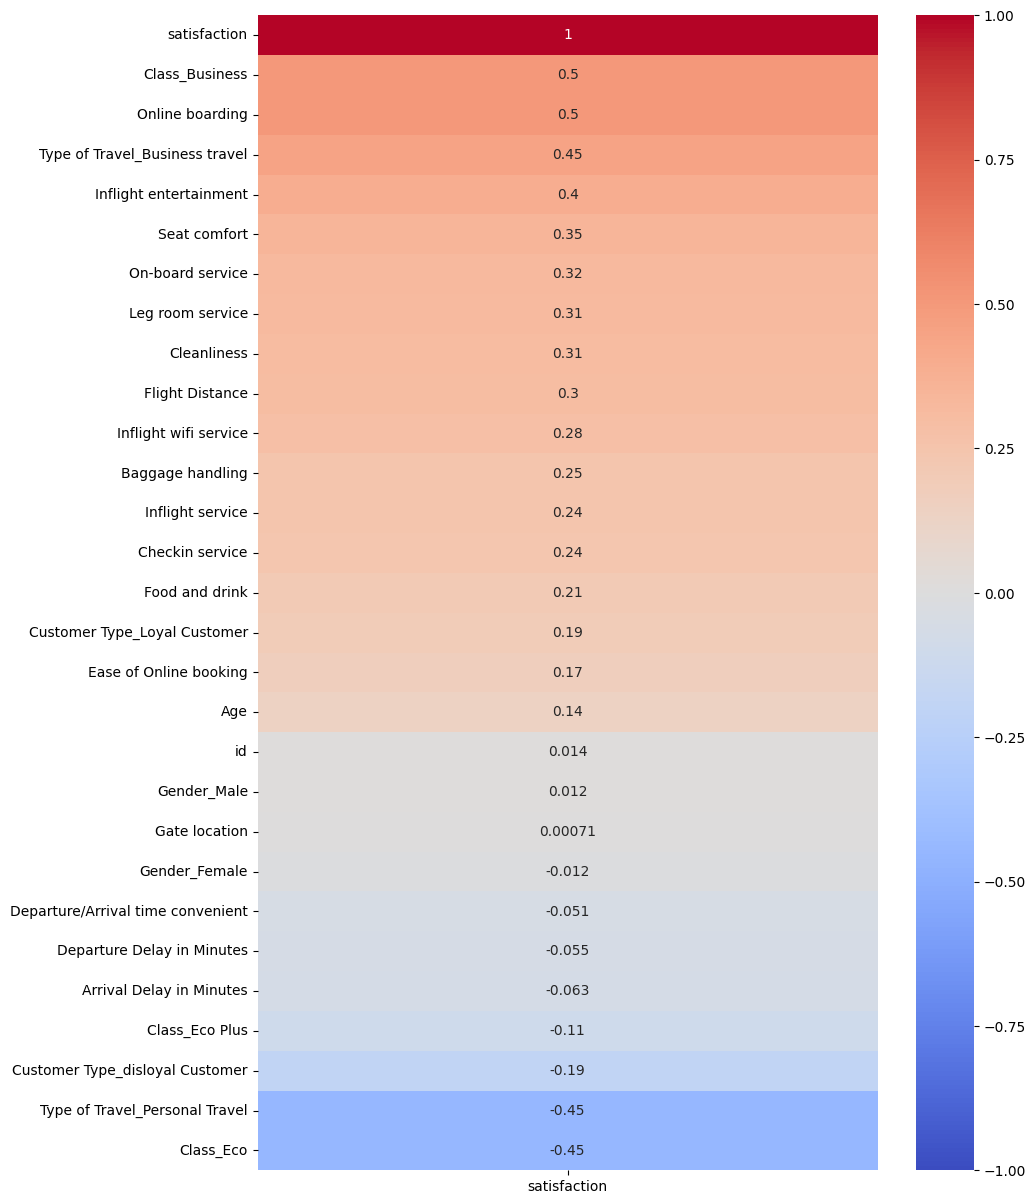

In [17]:
plt.figure(figsize = (10,15))

sns.heatmap(df_clean.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm');

> With that handled wehave a good base for picking our features and are ready to start preparing the model!

# Making the Model

> We start by establishing our baseline.

In [18]:
#Baseline goal
df_clean['satisfaction'].value_counts(normalize = True)

satisfaction
0    0.56658
1    0.43342
Name: proportion, dtype: float64

> We can see here that 56.658% of the reported fliers were neutral or dissatisfied. This score of 0.56658 is what our models must beat to be worth using. For the first model I am going to be using every feature available to see what we get, I will then limit it to only the features above a speific corr value based on our heat map and see how that changes


In [19]:
# Prep the model
drop_col_1 = ['satisfaction', 'id']
X = df_clean.drop(columns = drop_col_1)
y = df_clean['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

> With everything set up we can create the model. I will start by creating a loop to determine the best K value for our model.

In [22]:
#Testing best k value
scores = []

for k in range(3, 35, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    
    scores.append({'k': k, 'train_score': train_score, 'test_score' : test_score})

df_score = pd.DataFrame(scores)

In [23]:
# our highest test score is 0.924355 when k = 5 so that is what we will use!
df_score

,k,train_score,test_score
0,3,0.956355,0.922119
1,5,0.946614,0.924355
2,7,0.941177,0.923970
3,9,0.937592,0.922967
4,11,0.935522,0.923546
5,13,0.933659,0.923468
6,15,0.932541,0.922389
7,17,0.931063,0.921309
8,19,0.929932,0.921078
9,21,0.929148,0.920808


In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [25]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

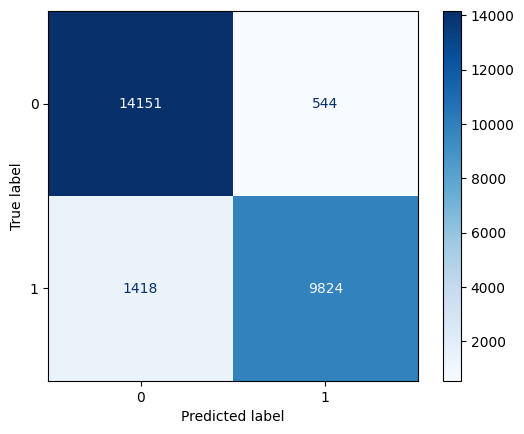

In [26]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues')

In [32]:
knn.score(X_test_sc, y_test)

0.9243551682924008

In [27]:
#precision
prec = (11242 / 11786)
prec

0.9538435431868318

In [28]:
#recall
recall = (11242 / 12660)
recall

0.8879936808846761

In [29]:
#specificity
spec = (14695 / 15239)
spec

0.964302119561651

> Overall the model did very well with an overall accuracy of 0.924355. Where it preformed less well was in Recall with a 0.88799. This means that the model had a higher tendancy for false negatives.
Lets see if our other models can improve on this. 

### KNN w/ Specific Features


> For this next model we are going to see if the model preforms better when the features are tuned to only include those with a corr value of at least 0.3

In [35]:
# Prep the model
drop_col_2 = ['satisfaction', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service', 'Food and drink', 'Customer Type_Loyal Customer', 'Ease of Online booking',
           'Age', 'id', 'Gender_Male', 'Gate location', 'Gender_Female', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Class_Eco Plus',
           'Customer Type_disloyal Customer'
           ]
X = df_clean.drop(columns = drop_col_2)
y = df_clean['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [36]:
#Testing best k value for new model reduced range as model seems to drop off after k = 10+
scores = []

for k in range(3, 15, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    
    scores.append({'k': k, 'train_score': train_score, 'test_score' : test_score})

df_score = pd.DataFrame(scores)

In [37]:
df_score

,k,train_score,test_score
0,3,0.935818,0.889887
1,5,0.922696,0.893858
2,7,0.915975,0.894167
3,9,0.912698,0.895593
4,11,0.910731,0.895516
5,13,0.908559,0.894861


> As we can see, reducing the number of features did NOT help this model as it heavily reduced the overall test score. With that we will move on to the other model types. 

### Logistic Regression

> For the next model we will be using Logistic Regression, since the previous model worked better with more features we will use the original set up for these next models

In [38]:
# Prep the model
drop_col_1 = ['satisfaction', 'id']
X = df_clean.drop(columns = drop_col_1)
y = df_clean['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [40]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [41]:
# Test Accuracy 
logr.score(X_test_sc, y_test)

0.8747349346493426

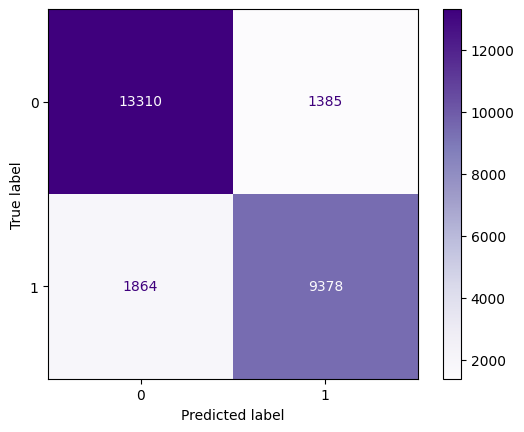

In [42]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Purples')

> We can see that overall this model did not preform as well as the knn model with more False Negatives and signifigantly more False Positives. 

### Random Forest

> For our last model we will be trying Random Forest to see if this can improve the results. 

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [45]:
rf.score(X_test_sc, y_test)

0.9624860238269654

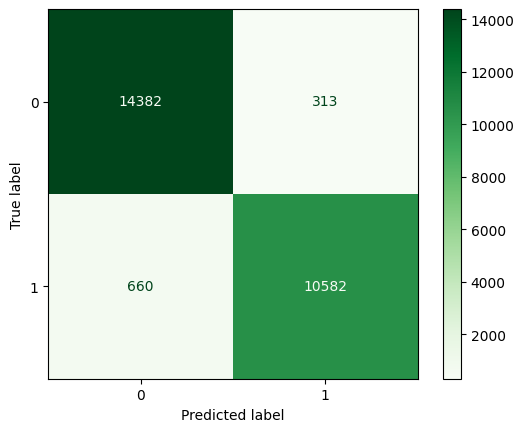

In [46]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Greens')

In [47]:
#precision
prec = (11242 / 11555)
prec

0.9729121592384249

In [48]:
#recall
recall = (11242 / 11902)
recall

0.944547134935305

In [49]:
#specificity
spec = (14695 / 15008)
spec

0.9791444562899787

> As we can see this final model has the best overall accuracy with a 0.9624860238269654, and drastically improved our Recall from 0.88799 to 0.94454!
> As this model preformed the best in every metric it is the one I would choose to present and/or improve upon if needed! 